In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [37]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler
sutunisimler=["id","tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [38]:
urunler=train["urun"].unique()

In [39]:
urunler

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [46]:
toplam_enflasyon=0
for urun in urunler:
    malzeme= train[train['urun'].isin([urun])]
    ortalama=malzeme.groupby("tarih").mean()
    ortalama=ortalama[12:]
    ortalama["enflasyon"]=0
    ortalama["fark"]=0
    ortalama["oran"]=0
    ortalama=ortalama.drop("besin",axis=1)
    for x in range(47):
        if x==47:
            ortalama.iloc[x:y,2:3]=0
        else:
            y=x+1
            z=y+1
            ortalama.iloc[x:y,1:2]=ortalama.iloc[y:z,0:1].values/ortalama.iloc[x:y,0:1].values
            ortalama.iloc[x:y,2:3]=ortalama.iloc[y:z,0:1].values-ortalama.iloc[x:y,0:1].values
            ortalama.iloc[x:y,3:4]=(ortalama.iloc[x:y,2:3].values*100)/ortalama.iloc[x:y,0:1].values
    toplam_enflasyon=toplam_enflasyon+(ortalama["enflasyon"].sum()/46)
enflasyon=toplam_enflasyon/79
print(toplam_enflasyon)
print(enflasyon)

82.46984473108553
1.0439220852036144


In [17]:
kiyma= train[train['urun'].isin(["kıyma"])]

In [18]:
ortalama=kiyma.groupby("tarih").mean()

In [130]:
#ortalama=ortalama.unique()

In [47]:
ortalama

,fiyat,enflasyon,fark,oran
tarih,,,,
2017-01-01,22.438333,1.016982,0.381042,1.698173
2017-02-01,22.819375,1.018205,0.415417,1.820456
2017-03-01,23.234792,1.021645,0.502917,2.164498
2017-04-01,23.737708,1.012278,0.291458,1.227828
2017-05-01,24.029167,1.008306,0.199583,0.830588
2017-06-01,24.228750,1.008444,0.204583,0.844383
2017-07-01,24.433333,1.012790,0.312500,1.278990
2017-08-01,24.745833,1.016147,0.399583,1.614750
2017-09-01,25.145417,1.031351,0.788333,3.135098


In [ ]:
    mart%0,57
    nisan%0,85
    masy%1,36
    haz%1,13 
    tem %0,58
    agostos  %0,86     
    eylül %0,97
2020 ekim %2,13

In [59]:
ortalama= ortalama[:-1]

[]

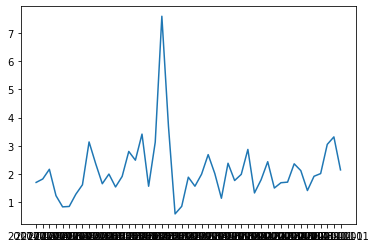

In [60]:
plt.plot(ortalama.index, ortalama["oran"])
plt.plot()

In [20]:
ortalama["enflasyon"]=0
ortalama["fark"]=0
ortalama["oran"]=0
ortalama=ortalama.drop("besin",axis=1)

In [21]:
for x in range(59):
    if x==59:
        ortalama.iloc[x:y,2:3]=0
    else:
        y=x+1
        z=y+1
        ortalama.iloc[x:y,1:2]=ortalama.iloc[y:z,0:1].values/ortalama.iloc[x:y,0:1].values
        ortalama.iloc[x:y,2:3]=ortalama.iloc[y:z,0:1].values-ortalama.iloc[x:y,0:1].values
        ortalama.iloc[x:y,3:4]=(ortalama.iloc[x:y,2:3].values*100)/ortalama.iloc[x:y,0:1].values

In [137]:
ortalama["oran"].mean()

2.068420116375678

In [138]:
ortalama["enflasyon"].mean()

1.00401753449709

In [139]:
ortalama["enflasyon"].sum()

60.24105206982541

In [57]:
ortalama

,fiyat,enflasyon,fark,oran
tarih,,,,
2017-01-01,22.438333,1.016982,0.381042,1.698173
2017-02-01,22.819375,1.018205,0.415417,1.820456
2017-03-01,23.234792,1.021645,0.502917,2.164498
2017-04-01,23.737708,1.012278,0.291458,1.227828
2017-05-01,24.029167,1.008306,0.199583,0.830588
2017-06-01,24.228750,1.008444,0.204583,0.844383
2017-07-01,24.433333,1.012790,0.312500,1.278990
2017-08-01,24.745833,1.016147,0.399583,1.614750
2017-09-01,25.145417,1.031351,0.788333,3.135098


In [75]:
ortalama=ortalama.drop("2020-12-01")

In [63]:
ortalama["enflasyon"].sum()/58#hindi

1.0385111668700204

In [62]:
ortalama["enflasyon"].mean()#hindi

1.003894127974353

In [170]:
ortalama["enflasyon"].mean()#tavuk

1.0041459731486162

In [65]:
ortalama["enflasyon"].mean()#buğday ekmeği

1.0039846370908896

In [49]:
ortalama["enflasyon"].mean()#kıyma

1.00401753449709

In [50]:
ortalama["enflasyon"].sum()/58

1.0386388287900932

In [48]:
enflasyon=1.0439220852036144

In [50]:
tarih2020=train.iloc[223728:,:]

In [51]:
ocak2021=tarih2020["fiyat"]*enflasyon
subat2021=ocak2021*enflasyon
mart2021=subat2021*enflasyon
nisan2021=mart2021*enflasyon
mayıs2021=nisan2021*enflasyon
haziran2021=mayıs2021*enflasyon
temmuz2021=haziran2021*enflasyon
agustos2021=temmuz2021*enflasyon
eylul2021=agustos2021*enflasyon
ekim2021=eylul2021*enflasyon
kasim2021=ekim2021*enflasyon
aralik2021=kasim2021*enflasyon

In [52]:
tarih2021=pd.concat([ocak2021,subat2021,mart2021,nisan2021,mayıs2021,haziran2021,temmuz2021,agustos2021,eylul2021,ekim2021,kasim2021,aralik2021]).reset_index()

In [53]:
tarih2021.head(50)

,index,fiyat
0,223728,120.907056
1,223729,39.293227
2,223730,39.846506
3,223731,23.874498
4,223732,42.571143
5,223733,18.999382
6,223734,20.210332
7,223735,43.688139
8,223736,41.088773
9,223737,87.793847


In [54]:
sutunisimler=["id","ürün fiyatı"]
tarih2021.columns=sutunisimler

In [55]:
tarih2021["id"]=tarih2021.index

In [56]:
tarih2021.to_csv("veriler\datathon\sonuclar\\latesub.csv",index=False)

In [140]:
tarih2021

,ürün fiyatı
0,116.285311
1,37.791220
2,38.323349
3,22.961881
4,40.943835
...,...
45499,53.713160
45500,57.857855
45501,61.488399
45502,54.384705


In [139]:
tarih2021= tarih2021.rename({'fiyat': 'ürün fiyatı'}, axis=1)

In [142]:
deneme=pd.read_csv('veriler\datathon\sonuclar\\datathon01040-3.csv')

In [143]:
sutunisimler=["id","ürün fiyatı"]
deneme.columns=sutunisimler

In [144]:
deneme.to_csv("veriler\datathon\sonuclar\\datathon01040-4.csv",index=False)

In [60]:
df=5

In [26]:
df=train

In [27]:
from datetime import datetime, date 
df['tarih'] = pd.to_datetime(df['tarih'], format = '%Y-%m-%d')
df.head().style.set_properties(subset=['tarih'], **{'background-color': 'dodgerblue'})


deneme=df.groupby(['tarih'])['fiyat'].transform('mean')

(16801.0, 18597.0)

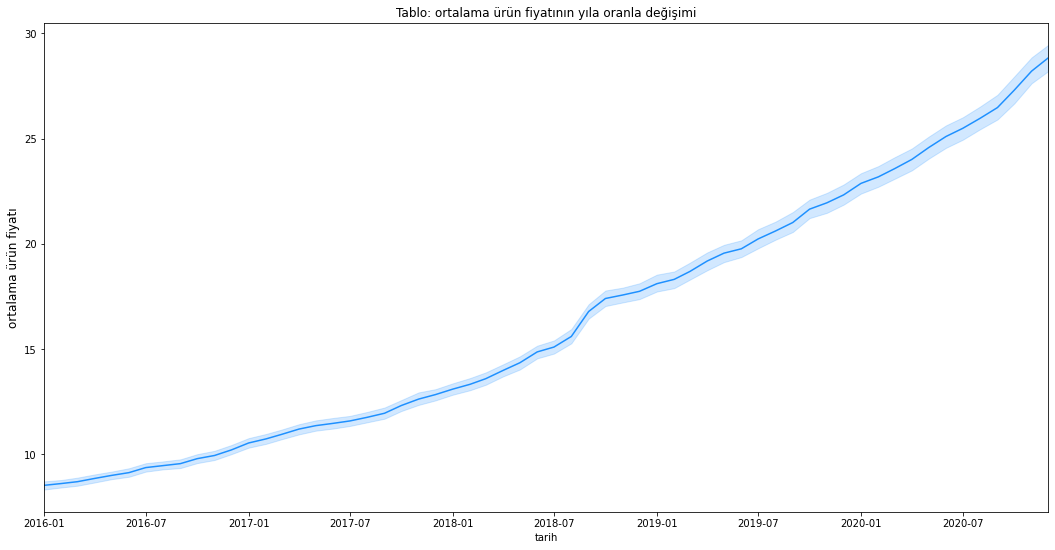

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,9))
sns.lineplot(x=df['tarih'], y=df['fiyat'].fillna(method='ffill'), color='dodgerblue')
ax.set_title('Tablo: {}'.format('ortalama ürün fiyatının yıla oranla değişimi'), fontsize=12)
ax.set_ylabel(ylabel='ortalama ürün fiyatı', fontsize=12)          
ax.set_xlim([date(2016, 1, 1), date(2020, 12, 1)])

In [64]:
deneme.unique()

array([ 8.5296308 ,  8.61539293,  8.70387131,  8.85940401,  9.00202004,
        9.1331962 ,  9.3728903 ,  9.46669568,  9.56087553,  9.79684072,
        9.94742616, 10.2099077 , 10.5418038 , 10.73476002, 10.9503692 ,
       11.20162711, 11.36460179, 11.47321466, 11.5876846 , 11.76075422,
       11.95365506, 12.32062236, 12.62611551, 12.83928006, 13.09914821,
       13.32892141, 13.59519251, 13.98766086, 14.35177215, 14.86663502,
       15.09758175, 15.60001319, 16.78602584, 17.40374209, 17.56953586,
       17.74542985, 18.10703586, 18.31218882, 18.68730485, 19.18283492,
       19.55725211, 19.76343354, 20.23199631, 20.60821994, 21.01239188,
       21.64645042, 21.94772416, 22.32467563, 22.87114451, 23.18044568,
       23.56876582, 24.01010021, 24.57082806, 25.09772152, 25.4862289 ,
       25.96260812, 26.47103112, 27.29652426, 28.20086498, 28.8352769 ])

In [87]:
aylik_enflasyon=train.groupby("tarih").mean()

In [88]:
aylik_enflasyon

,besin,fiyat
tarih,,
2016-01-01,143.113924,8.529631
2016-02-01,143.113924,8.615393
2016-03-01,143.113924,8.703871
2016-04-01,143.113924,8.859404
2016-05-01,143.113924,9.002020
2016-06-01,143.113924,9.133196
2016-07-01,143.113924,9.372890
2016-08-01,143.113924,9.466696
2016-09-01,143.113924,9.560876


In [67]:
ortalama=aylik_enflasyon

In [89]:
deneme=aylik_enflasyon

In [29]:
deneme

0          8.529631
1          8.529631
2          8.529631
3          8.529631
4          8.529631
            ...    
227515    28.835277
227516    28.835277
227517    28.835277
227518    28.835277
227519    28.835277
Name: fiyat, Length: 227520, dtype: float64

In [91]:
deneme=deneme.drop(["besin"],axis=1)

In [92]:
deneme=deneme.reset_index()

In [93]:
deneme

,tarih,fiyat
0,2016-01-01,8.529631
1,2016-02-01,8.615393
2,2016-03-01,8.703871
3,2016-04-01,8.859404
4,2016-05-01,9.002020
5,2016-06-01,9.133196
6,2016-07-01,9.372890
7,2016-08-01,9.466696
8,2016-09-01,9.560876
9,2016-10-01,9.796841


In [95]:
deneme["tarih"]=deneme.index

In [96]:
deneme

,tarih,fiyat
0,0,8.529631
1,1,8.615393
2,2,8.703871
3,3,8.859404
4,4,9.002020
5,5,9.133196
6,6,9.372890
7,7,9.466696
8,8,9.560876
9,9,9.796841


In [116]:
fiyat=deneme[["fiyat"]]
tarih=deneme[["tarih"]]

In [117]:
fiyat

,fiyat
0,8.529631
1,8.615393
2,8.703871
3,8.859404
4,9.002020
5,9.133196
6,9.372890
7,9.466696
8,9.560876
9,9.796841


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [119]:
x_train,x_test,y_train,y_test=train_test_split(tarih,fiyat,test_size=0.33,random_state=0)

In [120]:
lr=LinearRegression()

In [121]:
lr.fit(x_train,y_train)

LinearRegression()

In [122]:
tahmin=lr.predict(x_test)

In [141]:
tahmin

,0
2,15.144015
4,18.196647
7,26.336997
10,15.822378
11,10.056296
14,7.003665
22,17.857466
26,25.997816
28,19.892553
30,13.787290


In [125]:
y_test

,fiyat
26,13.595193
35,17.745430
59,28.835277
28,14.351772
11,10.209908
2,8.703871
34,17.569536
58,28.200865
40,19.557252
22,12.626116


In [138]:
tahmin=pd.DataFrame(tahmin)

In [140]:
tahmin.index=y_test.index

In [134]:
x_train=x_train.sort_index()
y_train=y_train.sort_index()
y_test=y_test.sort_index()

In [127]:
import matplotlib.pyplot as plt

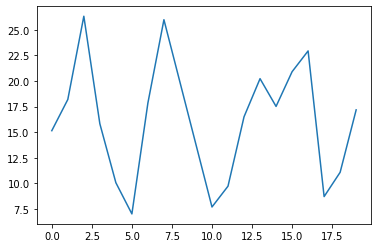

In [137]:
plt.plot(tahmin)

In [136]:
y_test

,fiyat
2,8.703871
4,9.002020
7,9.466696
10,9.947426
11,10.209908
14,10.950369
22,12.626116
26,13.595193
28,14.351772
30,15.097582


In [145]:
len(tarih2020)

3792

In [218]:
tarih2016=train.iloc[:3792,:]

In [219]:
enflasyon=1.025131097258726

In [220]:
ocak2021=tarih2016["fiyat"]*enflasyon
subat2021=ocak2021*enflasyon
mart2021=subat2021*enflasyon
nisan2021=mart2021*enflasyon
mayıs2021=nisan2021*enflasyon
haziran2021=mayıs2021*enflasyon
temmuz2021=haziran2021*enflasyon
agustos2021=temmuz2021*enflasyon
eylul2021=agustos2021*enflasyon
ekim2021=eylul2021*enflasyon
kasim2021=ekim2021*enflasyon
aralik2021=kasim2021*enflasyon

In [227]:
ocak2021=aralik2021*enflasyon
subat2021=ocak2021*enflasyon
mart2021=subat2021*enflasyon
nisan2021=mart2021*enflasyon
mayıs2021=nisan2021*enflasyon
haziran2021=mayıs2021*enflasyon
temmuz2021=haziran2021*enflasyon
agustos2021=temmuz2021*enflasyon
eylul2021=agustos2021*enflasyon
ekim2021=eylul2021*enflasyon
kasim2021=ekim2021*enflasyon
aralik2021=kasim2021*enflasyon

In [228]:
ocak2021.head()

0    151.851947
1     50.996074
2     50.541564
3     31.906635
4     59.722675
Name: fiyat, dtype: float64

In [194]:
aralik2021

0       221.304958
1        74.320312
2        73.657921
3        46.499874
4        87.038226
           ...    
3787     94.125814
3788     99.557423
3789    106.512533
3790    101.213402
3791    120.157795
Name: fiyat, Length: 3792, dtype: float64